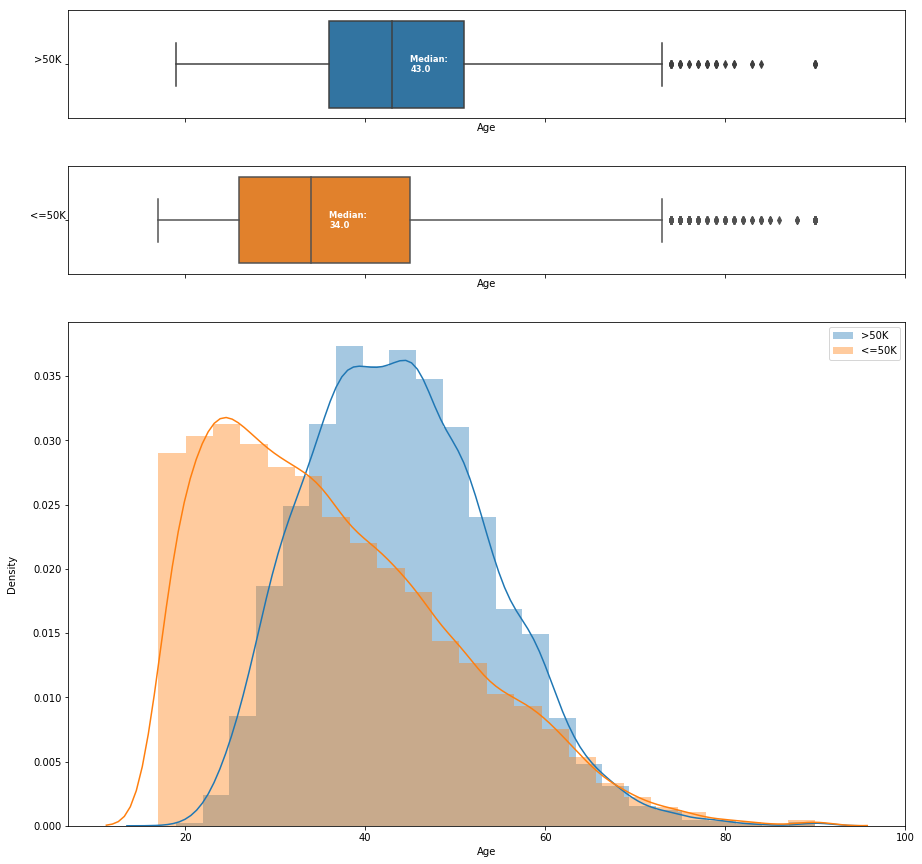

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adults = pd.read_csv('dataset/adult.data.txt', sep=", ", header=None, engine='python')
adults.columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Num',
                  'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
                  'Capital-Gain', 'Capital-Loss', 'Hours_Per_Week', 'Native_Country', 'Income']

adults = adults[adults['Work_Class'] != '?']
adults = adults[adults['Education'] != '?']
adults = adults[adults['Marital_Status'] != '?']
adults = adults[adults['Occupation'] != '?']
adults = adults[adults['Relationship'] != '?']
adults = adults[adults['Race'] != '?']
adults = adults[adults['Sex'] != '?']
adults = adults[adults['Native_Country'] != '?']

adults_above = adults[adults['Income'] == '>50K']
adults_below = adults[adults['Income'] == '<=50K']

above_median = adults_above['Age'].median()
above_offset = 2
below_median = adults_below['Age'].median()
below_offset = 2

above_median_string = 'Median: \n{0}'.format(above_median)
below_median_string = 'Median: \n{0}'.format(below_median)

fig, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .7)}, figsize=(15, 15))

sns.boxplot(adults_above['Age'], ax=ax_box1, color='tab:blue')
sns.boxplot(adults_below['Age'], ax=ax_box2, color='tab:orange')
sns.distplot(adults_above['Age'], kde=True, norm_hist=True, ax=ax_hist, bins=24)
sns.distplot(adults_below['Age'], kde=True, norm_hist=True, ax=ax_hist, bins=24)

ax_box1.set_xlabel('Age')
ax_box2.set_xlabel('Age')
ax_hist.set_xlabel('Age')
ax_box1.set_ylabel('>50K      ', rotation=0)
ax_box2.set_ylabel('<=50K      ', rotation=0)
ax_hist.legend(['>50K', '<=50K'])
ax_hist.set_ylabel('Density\n')

ax_box1.text(above_median + above_offset, ax_box1.get_yticks()[0], above_median_string, verticalalignment='center', size='small', color='w', weight='semibold')
ax_box2.text(below_median + below_offset, ax_box2.get_yticks()[0], below_median_string, verticalalignment='center', size='small', color='w', weight='semibold')

plt.show()

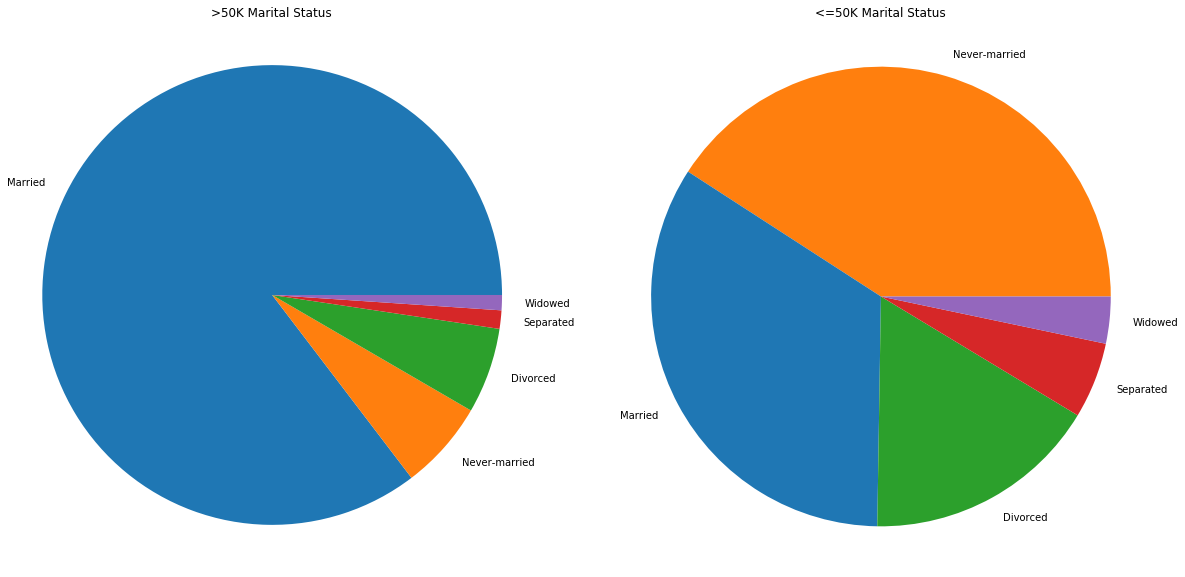

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

adults = pd.read_csv('dataset/adult.data.txt', sep=", ", header=None, engine='python')
adults.columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Num',
                  'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
                  'Capital-Gain', 'Capital-Loss', 'Hours_Per_Week', 'Native_Country', 'Income']

adults = adults[adults['Work_Class'] != '?']
adults = adults[adults['Education'] != '?']
adults = adults[adults['Marital_Status'] != '?']
adults = adults[adults['Occupation'] != '?']
adults = adults[adults['Relationship'] != '?']
adults = adults[adults['Race'] != '?']
adults = adults[adults['Sex'] != '?']
adults = adults[adults['Native_Country'] != '?']

adults['Marital_Status'] = adults['Marital_Status'].replace(['Married-AF-spouse', 'Married-civ-spouse'], 'Married')
adults['Marital_Status'] = adults['Marital_Status'].replace('Married-spouse-absent', 'Separated')

adults_above = adults[adults['Income'] == '>50K']
adults_below = adults[adults['Income'] == '<=50K']

married_counts_above = adults_above['Marital_Status'].value_counts()
married_counts_below = adults_below['Marital_Status'].value_counts()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

axes[0].pie(married_counts_above, labels=married_counts_above.index)
axes[0].set_title(">50K Marital Status")
axes[0].axis('equal')

axes[1].pie(married_counts_below, labels=married_counts_below.index, colors=['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple'])
axes[1].set_title("<=50K Marital Status")
axes[1].axis('equal')

plt.show()